In [1]:
try:           #importing rSNAPsim
    import rSNAPsim
except:
    import os
    os.chdir('..')
    import rSNAPsim
    
rss = rSNAPsim.rSNAPsim()

In [2]:
rss = rSNAPsim.rSNAPsim()

#lets load in the sequence for the human insulin receptor INSR protein
try:
    rss.open_seq_file('gene_files/HUMINSR.gb')
except:
    rss.get_gb_file('M10051')


What does the rss now contain?

In [3]:
rss.sequence_str  #the sequence

'GGGGGGCTGCGCGGCCGGGTCGGTGCGCACACGAGAAGGACGCGCGGCCCCCAGCGCTCTTGGGGGCCGCCTCGGAGCATGACCCCCGCGGGCCAGCGCCGCGCGCCTGATCCGAGGAGACCCCGCGCTCCCGCAGCCATGGGCACCGGGGGCCGGCGGGGGGCGGCGGCCGCGCCGCTGCTGGTGGCGGTGGCCGCGCTGCTACTGGGCGCCGCGGGCCACCTGTACCCCGGAGAGGTGTGTCCCGGCATGGATATCCGGAACAACCTCACTAGGTTGCATGAGCTGGAGAATTGCTCTGTCATCGAAGGACACTTGCAGATACTCTTGATGTTCAAAACGAGGCCCGAAGATTTCCGAGACCTCAGTTTCCCCAAACTCATCATGATCACTGATTACTTGCTGCTCTTCCGGGTCTATGGGCTCGAGAGCCTGAAGGACCTGTTCCCCAACCTCACGGTCATCCGGGGATCACGACTGTTCTTTAACTACGCGCTGGTCATCTTCGAGATGGTTCACCTCAAGGAACTCGGCCTCTACAACCTGATGAACATCACCCGGGGTTCTGTCCGCATCGAGAAGAACAATGAGCTCTGTTACTTGGCCACTATCGACTGGTCCCGTATCCTGGATTCCGTGGAGGATAATCACATCGTGTTGAACAAAGATGACAACGAGGAGTGTGGAGACATCTGTCCGGGTACCGCGAAGGGCAAGACCAACTGCCCCGCCACCGTCATCAACGGGCAGTTTGTCGAACGATGTTGGACTCATAGTCACTGCCAGAAAGTTTGCCCGACCATCTGTAAGTCACACGGCTGCACCGCCGAAGGCCTCTGTTGCCACAGCGAGTGCCTGGGCAACTGTTCTCAGCCCGACGACCCCACCAAGTGCGTGGCCTGCCGCAACTTCTACCTGGACGGCAGGTGTGTGGAGACCTGCCCGCCCCCGTACTACCACTTCCAGGACTGGCGCTGTGTGAACTTCAGCTTCTGCCAG

In [4]:
rss.sequence_name

'HUMINSR'

In [5]:
# now to look for open reading frames

rss.get_orfs(rss.sequence_str)
rss.orfs

{'1': [(78, 4284)], '2': [(667, 979)], '3': []}

In [6]:
protein1 = rss.sequence_str[78:4284]
rss.nt2aa(protein1)

'MTPAGQRRAPDPRRPRAPAAMGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVIGSIYLFL

In [7]:
rss.get_temporal_proteins()  #proteins sorted byh 
print(rss.proteins)
print(' ')
print(rss.pois)   #proteins of interest in a list
print(' ')
print(rss.pois_seq) # and their sequences

{'1': ['MTPAGQRRAPDPRRPRAPAAMGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVI

In [8]:
rss.analyze_poi(rss.pois[0],rss.pois_seq[0]) #analyze the first protein, analyze function takes the aa_seq then nt_seq
rss.POI

<rSNAPsim.poi instance at 0x0000000009115C08>

In [9]:
print(rss.POI.tag_epitopes)
print(' ')
print(rss.POI.aa_seq)

{'T_Flag': [2, 11, 20, 196, 206, 218, 228, 300, 309, 318]}
 
MDYKDDDDKGDYKDDDDKGDYKDDDDKGGNSLIKENMRMKVVMEGSVNGHQFKCTGEGEGNPYMGTQTMRIKVIEGGPLPFAFDILATSFGGGSRTFIKYPKGIPDFFKQSFPEGFTWERVTRYEDGGVVTVMQDTSLEDGCLVYHVQVRGVNFPSNGPVMQKKTKGWEPNTEMMYPADGGLRGYTHMALKVDGGDYKDDDDKQQDYKDDDDKGQQGDYKDDDDKQQDYKDDDDKGGGHLSCSFVTTYRSKKTVGNIKMPGIHAVDHRLERLEESDNEMFVVQREHAVAKFAGLGGGGGDYKDDDDKGDYKDDDDKGDYKDDDDKGGGGSGGGGSLQMGTGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNHIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTTTQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDKASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDE

Note that the HUMNINSR was automatically tagged with a 10x FLAG tag since no fluorescent tag was detected

C:\Users\wsraymon\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


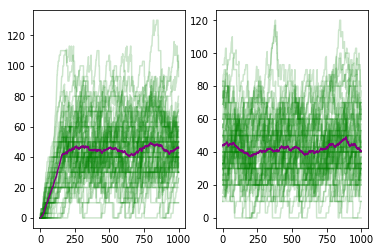

In [10]:
ssa1 = rss.ssa_solver(n_traj = 50)
ssa2 = rss.ssa_solver(n_traj = 50,start_time=1000,tf=2000,tstep=2000)  #steady state

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot('121')
ax2 = fig.add_subplot('122')
ax.plot(ssa1.intensity_vec.T,color='green',alpha=.2)
ax.plot(np.mean(ssa1.intensity_vec.T,axis=1),color='purple')

ax2.plot(ssa2.intensity_vec.T,color='green',alpha=.2)
ax2.plot(np.mean(ssa2.intensity_vec.T,axis=1),color='purple')
fig.show()



[-33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33.
 -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33.
 -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33.
 -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33.
 -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33.
 -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33.
 -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33.
 -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33. -33.
 -33. -33. -23. -23. -23. -23. -23. -23. -23. -23. -23. -23. -23. -23.
 -23. -23. -23. -23. -23. -23. -23. -23. -23. -23. -23. -23. -23. -23.
 -23.]
[-50. -50. -50. -50. -50. -50. -50. -50. -50. -50. -50. -50. -50. -50.
 -50. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40.
 -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40. -40.
 -30. -30. -30. -30. -30. -30. -30. -30. -30. -30. -30. -20. -20. -20.

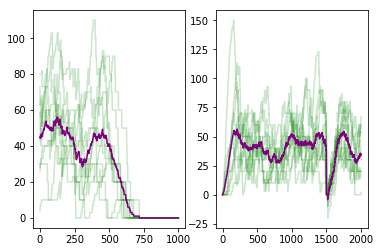

In [12]:
ssa1 = rss.ssa_solver(n_traj = 10,start_time=1000,tf=2000,tstep=2000,evaluating_inhibitor=True,time_inhibit=1500) 
ssa2 = rss.ssa_solver(n_traj = 10,start_time=0,tf=2000,tstep=2000,evaluating_frap=True,time_inhibit=1500)  #steady state

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot('121')
ax2 = fig.add_subplot('122')
ax.plot(ssa1.intensity_vec.T,color='green',alpha=.2)
ax.plot(np.mean(ssa1.intensity_vec.T,axis=1),color='purple')

ax2.plot(ssa2.intensity_vec.T,color='green',alpha=.2)
ax2.plot(np.mean(ssa2.intensity_vec.T,axis=1),color='purple')
fig.show()
